# CAMPUS PLACEMENT PREDICTION

In [204]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV    #for parameric tuning
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC                          #SVC - Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier  
import xgboost as xgb


In [205]:
data = pd.read_csv("/home/azr/Documents/project/Placement_Data_Full_Class.csv")
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [206]:
data.shape

(215, 15)

In [207]:
data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [208]:
# to get the count of missing values
data.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [209]:
#Let's check and see if all the students that are not placed have null salary
data['status'][data['salary'].isnull()].unique()

array(['Not Placed'], dtype=object)


All the not placed students are the ones with no salary.

So lets just input them with a 0.


In [210]:
data['salary'].fillna(0, inplace=True)
data.isnull().sum()#Checking for null values

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [211]:
#counting duplicate 
data.duplicated().sum()

0

In [212]:
data.drop(['sl_no'], axis=1, inplace = True)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [213]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# Handling Outliers

In [214]:
 # Check if there is any outliers
numcols = data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index
numcols

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

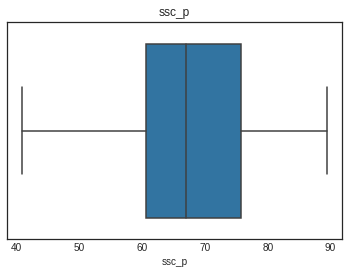

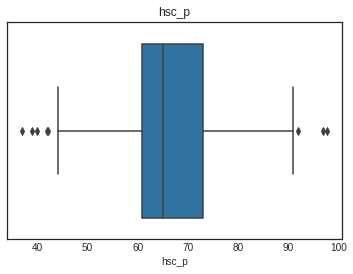

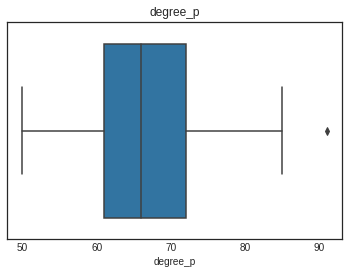

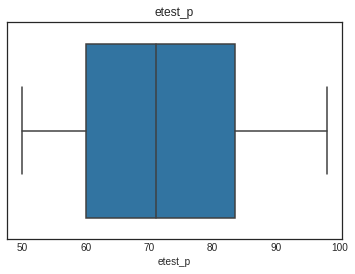

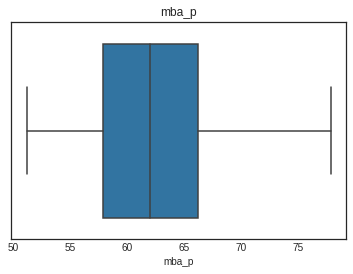

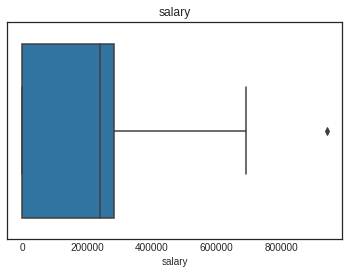

In [215]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

The majority of outliers are present in 'hsc_p'

In [216]:
IQR = descr['75%'] - descr['25%']
upper_limit =  descr['75%'] + 1.5 * IQR
lower_limit =  descr['25%'] - 1.5 * IQR 

In [217]:
#outlier replacement
data['hsc_p'][data['hsc_p']>upper_limit] = upper_limit
data['hsc_p'][data['hsc_p']<lower_limit] = lower_limit

<AxesSubplot:xlabel='hsc_p'>

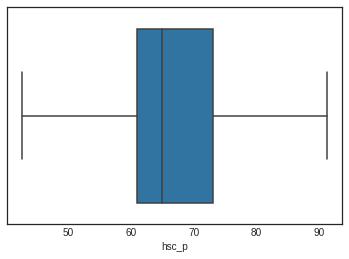

In [218]:
#for visualizing boxplot we use seaborn
sns.boxplot(data['hsc_p'],orient='h')

# Exploratory data analysis

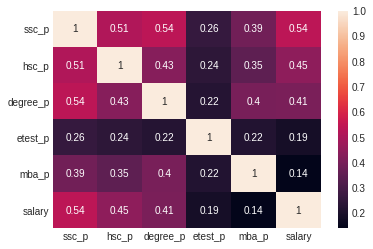

In [219]:
sns.heatmap(data.corr(), annot=True);

All numerical columns are positively correlated.

In [220]:
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

Out of 215 students, 148 are placed and 67 are not placed.

In [221]:
data.groupby(['status'])['gender'].value_counts()

status      gender
Not Placed  M          39
            F          28
Placed      M         100
            F          48
Name: gender, dtype: int64

Text(0.5, 1.0, 'Distribution of Placements in Males and Females')

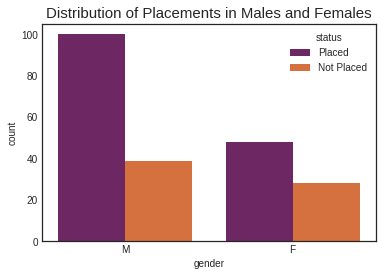

In [222]:
sns.countplot('gender',data = data,palette = 'inferno',hue = 'status')
plt.title("Distribution of Placements in Males and Females",fontsize = 15)

Male candidates are more placed than females

In [223]:
data.groupby(['status'])['workex'].value_counts()

status      workex
Not Placed  No        57
            Yes       10
Placed      No        84
            Yes       64
Name: workex, dtype: int64

Text(0.5, 1.0, 'Relation between the work experience and placement')

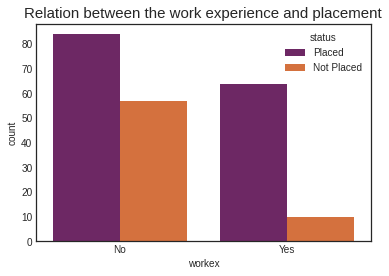

In [224]:
sns.countplot('workex',data = data,palette = 'inferno',hue = 'status')
plt.title("Relation between the work experience and placement",fontsize = 15)

More students with no work experience are placed more

In [225]:
data.groupby(['status'])['degree_t'].value_counts()

status      degree_t 
Not Placed  Comm&Mgmt     43
            Sci&Tech      18
            Others         6
Placed      Comm&Mgmt    102
            Sci&Tech      41
            Others         5
Name: degree_t, dtype: int64

Text(0.5, 1.0, 'Relation between the degree type and their placement')

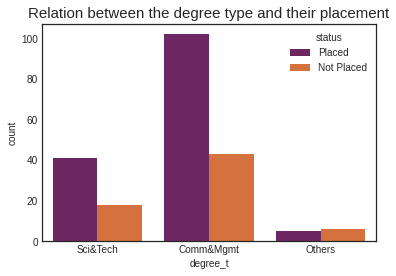

In [226]:
sns.countplot('degree_t',data = data,palette = 'inferno',hue = 'status')
plt.title("Relation between the degree type and their placement",fontsize = 15)

Commerce and Management students are placed more than other degrees

In [227]:
data.groupby(['status'])['specialisation'].value_counts()

status      specialisation
Not Placed  Mkt&HR            42
            Mkt&Fin           25
Placed      Mkt&Fin           95
            Mkt&HR            53
Name: specialisation, dtype: int64

Text(0.5, 1.0, 'Relation between the Students that were placed according to specialisation')

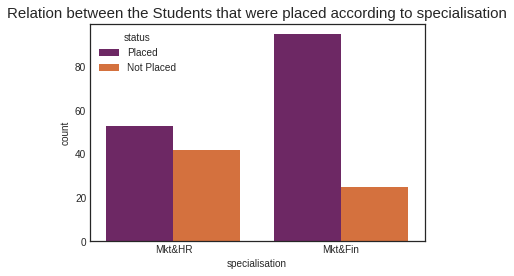

In [228]:
sns.countplot('specialisation',data = data,palette = 'inferno',hue = 'status')
plt.title("Relation between the Students that were placed according to specialisation",fontsize = 15)

More students are placed from Marketing and finance stream

In [229]:
data.groupby(['status'])['hsc_b'].value_counts()

status      hsc_b  
Not Placed  Others     40
            Central    27
Placed      Others     91
            Central    57
Name: hsc_b, dtype: int64

Text(0.5, 1.0, 'Relation between the Students that were placed and the boards that they were in High School')

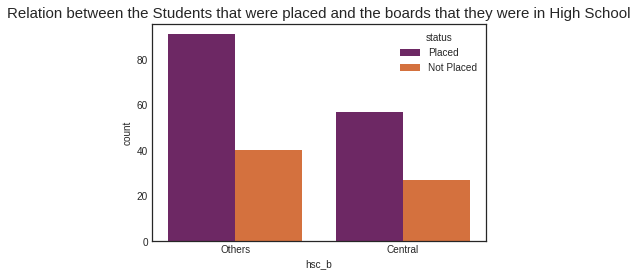

In [230]:
sns.countplot('hsc_b',data = data,palette = 'inferno',hue = 'status')
plt.title("Relation between the Students that were placed and the boards that they were in High School",fontsize = 15)

Central Board of education dose not affect for getting placed

In [231]:
data.groupby(['status'])['hsc_s'].value_counts()

status      hsc_s   
Not Placed  Commerce    34
            Science     28
            Arts         5
Placed      Commerce    79
            Science     63
            Arts         6
Name: hsc_s, dtype: int64

Text(0.5, 1.0, 'Relation between the Students that were placed and Specialization in Higher Secondary Education')

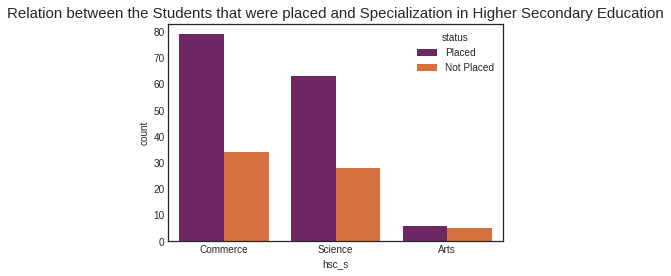

In [232]:
sns.countplot('hsc_s',data = data,palette = 'inferno',hue = 'status')
plt.title("Relation between the Students that were placed and Specialization in Higher Secondary Education",fontsize = 15)

Commerce students are placed more than science and arts.

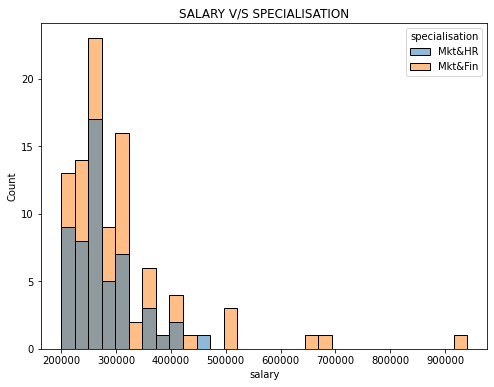

In [10]:
f = plt.subplots(figsize = (8 , 6))
sns.histplot(data = data, x = "salary", hue = 'specialisation', bins = 30)
plt.title("SALARY V/S SPECIALISATION")
plt.show()

Many candidates who got placed received package between 2L-4L PA.Marketing and finance are more likely to be placed with salary of 3L PA.And maximum salary recieved by the candidate is 9L PA.

# Data Preprocessing

In [188]:
data["gender"] = data.gender.map({"M":0,"F":1})
data["hsc_s"] = data.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
data["degree_t"] = data.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
data["workex"] = data.workex.map({"No":0, "Yes":1})
data["status"] = data.status.map({"Not Placed":0, "Placed":1})
data["specialisation"] = data.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})
data['hsc_b'] = data.hsc_b.map({'Others':0, 'Central':1})
data['ssc_b'] = data.ssc_b.map({'Others':0, 'Central':1})


In [189]:
data = pd.get_dummies(data, columns = ['gender', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'hsc_b', 'ssc_b'])
data

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,gender_0,gender_1,hsc_s_0,...,degree_t_1,degree_t_2,workex_0,workex_1,specialisation_0,specialisation_1,hsc_b_0,hsc_b_1,ssc_b_0,ssc_b_1
0,67.00,91.00,58.00,55.0,58.80,1,270000.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1,79.33,78.33,77.48,86.5,66.28,1,200000.0,1,0,0,...,1,0,0,1,0,1,1,0,0,1
2,65.00,68.00,64.00,75.0,57.80,1,250000.0,1,0,0,...,0,0,1,0,0,1,0,1,0,1
3,56.00,52.00,52.00,66.0,59.43,0,0.0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
4,85.80,73.60,73.30,96.8,55.50,1,425000.0,1,0,1,...,0,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,1,400000.0,1,0,1,...,0,0,1,0,0,1,1,0,1,0
211,58.00,60.00,72.00,74.0,53.62,1,275000.0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
212,67.00,67.00,73.00,59.0,69.72,1,295000.0,1,0,1,...,0,0,0,1,0,1,1,0,1,0
213,74.00,66.00,58.00,70.0,60.23,1,204000.0,0,1,1,...,0,0,1,0,1,0,1,0,1,0


In [190]:
# StandardScaler is used for scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns_to_scale = ['ssc_p','hsc_p','degree_p','etest_p','mba_p']
data[columns_to_scale] = sc.fit_transform(data[columns_to_scale])

# Model building

In [191]:
#spliting data into X and y
y = data['status']
X = data.drop(['status', 'salary'], axis=1)

In [192]:
X.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_0,gender_1,hsc_s_0,hsc_s_1,hsc_s_2,...,degree_t_1,degree_t_2,workex_0,workex_1,specialisation_0,specialisation_1,hsc_b_0,hsc_b_1,ssc_b_0,ssc_b_1
0,-0.028087,2.335422,-1.140102,-1.291091,-0.597647,1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
1,1.113369,1.135767,1.513267,1.087157,0.687620,1,0,0,1,0,...,1,0,0,1,0,1,1,0,0,1
2,-0.213238,0.157674,-0.322843,0.218908,-0.769474,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,1
3,-1.046417,-1.357281,-1.957362,-0.460592,-0.489396,1,0,0,1,0,...,1,0,1,0,1,0,0,1,0,1
4,1.712332,0.687909,0.943909,1.864806,-1.164676,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,1


In [193]:
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

# Logistic Regression

In [194]:
logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression()

In [195]:
y_pred=logre.predict(X_test)

In [196]:
confusion_matrix(y_test,y_pred)

array([[ 9,  3],
       [ 2, 29]])

In [197]:
# ACCURACY SCORE
accuracy_score(y_test,y_pred)

0.8837209302325582

In [198]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



# KNN

In [199]:
n_classifier = KNeighborsClassifier(n_neighbors=3)

In [200]:
n_classifier.fit(X_train,y_train)
y_pred_KNN=n_classifier.predict(X_test)

In [201]:
#ACCURACY SCORE
accuracy_score(y_test,y_pred_KNN)

0.813953488372093

In [202]:
#confusion matrix
confusion_matrix(y_test,y_pred_KNN)

array([[ 6,  6],
       [ 2, 29]])

In [203]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.83      0.94      0.88        31

    accuracy                           0.81        43
   macro avg       0.79      0.72      0.74        43
weighted avg       0.81      0.81      0.80        43



# Random Forest Classifier

In [71]:
cls1=RandomForestClassifier(random_state=42)

In [99]:
n_estimators=[30,32,35,40,45,50,55,60]
criterion=['gini','entropy'] #criteria for choosing nodes default = 'gini'
max_depth=[10] #maximum number of nodes in a tree default = None (it will go till all possible nodes)
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':maxentropy_depth} #this will undergo 4*2*3 = 24 iterations
RFC_cls = GridSearchCV(cls1, parameters)
RFC_cls.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy', max_depth=10,
                                              n_estimators=50),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [10],
                         'n_estimators': [30, 32, 35, 40, 45, 50, 55, 60]})

In [100]:
# #to get the best parameter for the model
RFC_cls.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 45}

In [119]:
cls1=RandomForestClassifier(n_estimators=45,criterion='gini',max_depth=10)

In [120]:
cls1.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=45)

In [121]:
y_pred2=cls1.predict(X_test)

In [122]:
confusion_matrix(y_test,y_pred2)

array([[ 7,  5],
       [ 2, 29]])

In [123]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.85      0.94      0.89        31

    accuracy                           0.84        43
   macro avg       0.82      0.76      0.78        43
weighted avg       0.83      0.84      0.83        43



# XGBoost

In [110]:
classifier = xgb.XGBClassifier()  #XGBClassifier object is created
classifier.fit(X_train, y_train)

[10:13:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
y_pred3 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[ 7  5]
 [ 2 29]]


0.8372093023255814

In [112]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.85      0.94      0.89        31

    accuracy                           0.84        43
   macro avg       0.82      0.76      0.78        43
weighted avg       0.83      0.84      0.83        43



# Among four classification algorithms used, logistic regression achieved 88 % accuracy.